# NBA Data cleaning

This is the second part of my NBA project to predict the MVP's. This file will concentrate in cleaning the data 
that was previously scraped from the site Basketball-Reference.

In [1]:
import pandas as pd

## Players and MVP's

In [2]:
## Bringing the MVP-file created before to the notebook to clean it.

mvps = pd.read_csv('mvps.csv')
mvps.head()

,Unnamed: 0,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,0,1,Magic Johnson,30,LAL,27.0,636.0,920,0.691,79,...,6.6,11.5,1.7,0.4,0.480,0.384,0.890,16.5,0.270,1990
1,1,2,Charles Barkley,26,PHI,38.0,614.0,920,0.667,79,...,11.5,3.9,1.9,0.6,0.600,0.217,0.749,17.3,0.269,1990
2,2,3,Michael Jordan,26,CHI,21.0,564.0,920,0.613,82,...,6.9,6.3,2.8,0.7,0.526,0.376,0.848,19.0,0.285,1990
3,3,4,Karl Malone,26,UTA,2.0,214.0,920,0.233,82,...,11.1,2.8,1.5,0.6,0.562,0.372,0.762,15.9,0.245,1990
4,4,5,Patrick Ewing,27,NYK,1.0,162.0,920,0.176,82,...,10.9,2.2,1.0,4.0,0.551,0.250,0.775,13.5,0.205,1990


In [3]:
mvps = mvps[['Player', 'Year', 'Pts Won', 'Pts Max', 'Share']]

mvps

,Player,Year,Pts Won,Pts Max,Share
0,Magic Johnson,1990,636.0,920,0.691
1,Charles Barkley,1990,614.0,920,0.667
2,Michael Jordan,1990,564.0,920,0.613
3,Karl Malone,1990,214.0,920,0.233
4,Patrick Ewing,1990,162.0,920,0.176
...,...,...,...,...,...
508,Stephen Curry,2023,5.0,1000,0.005
509,Jimmy Butler,2023,3.0,1000,0.003
510,De'Aaron Fox,2023,2.0,1000,0.002
511,Jalen Brunson,2023,1.0,1000,0.001


In [4]:
players = pd.read_csv('players.csv')

In [5]:
players.head()

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,1,Mark Acres,C,27,ORL,80,50,21.1,1.7,...,1.9,3.5,5.4,0.8,0.5,0.3,0.9,3.1,4.5,1990
1,1,2,Michael Adams,PG,27,DEN,79,74,34.1,5.0,...,0.6,2.2,2.8,6.3,1.5,0.0,1.8,1.7,15.5,1990
2,2,3,Mark Aguirre,SF,30,DET,78,40,25.7,5.6,...,1.5,2.4,3.9,1.9,0.4,0.2,1.6,2.6,14.1,1990
3,3,4,Danny Ainge,PG,30,SAC,75,68,36.4,6.7,...,0.9,3.4,4.3,6.0,1.5,0.2,2.5,3.2,17.9,1990
4,4,5,Mark Alarie,PF,26,WSB,82,10,23.1,4.5,...,1.8,2.7,4.6,1.7,0.7,0.5,1.2,2.7,10.5,1990


In [6]:
# Deleting unnesessary columns

del players['Unnamed: 0']
del players['Rk']

In [7]:
## Some players have a star '*' behind their name, which we want to remove:

players['Player'] = players['Player'].str.replace('*', '', regex = False)

In [8]:
## Some players have multiple rows for the same year, which we will combine
## As an example in the beginning of the list 'Uwe Blab' is mentioned in three rows

players[players["Player"] == "Uwe Blab"]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
25,Uwe Blab,C,27,TOT,47,33,11.3,0.8,2.1,0.398,...,0.6,1.7,2.3,0.5,0.0,0.5,0.7,2.2,2.1,1990
26,Uwe Blab,C,27,GSW,40,33,12.0,0.8,2.2,0.379,...,0.7,1.8,2.5,0.6,0.0,0.6,0.8,2.3,2.1,1990
27,Uwe Blab,C,27,SAS,7,0,7.1,0.9,1.6,0.545,...,0.1,1.1,1.3,0.1,0.0,0.0,0.7,1.3,2.1,1990


In [9]:
## This function will get rid of the extra rows, and take into account just the total amount of the games per player 
## per year. 

def player_single_row(df):
    if df.shape[0] == 1:
        return df
    else:
        row = df[df['Tm'] == 'TOT'] ## 'TOT' line shows the total points for the year per player, so that is used
        row['Tm'] = df.iloc[-1,:]['Tm'] ## Additionally the 'TOT' is changed to a team in the row below (most matches)
        return row

players = players.groupby(["Player", "Year"]).apply(player_single_row)

In [10]:
players.head(10)

Player Pos  Age   Tm   G  GS    MP   FG   FGA  \
Player     Year                                                           
A.C. Green 1990 141   A.C. Green  PF   26  LAL  82  82  33.0  4.7   9.8   
           1991 618   A.C. Green  PF   27  LAL  82  21  26.4  3.1   6.6   
           1992 1068  A.C. Green  PF   28  LAL  82  53  35.4  4.7   9.8   
           1993 1510  A.C. Green  PF   29  LAL  82  55  34.4  4.6   8.6   
           1994 1978  A.C. Green  PF   30  PHO  82  55  34.5  5.7  11.3   
           1995 2447  A.C. Green  SF   31  PHO  82  52  32.8  3.8   7.5   
           1996 2924  A.C. Green  SF   32  PHO  82  36  25.8  2.6   5.4   
           1997 3479  A.C. Green  PF   33  DAL  83  73  30.0  2.8   5.8   
           1998 4045  A.C. Green  PF   34  DAL  82  68  32.3  3.0   6.5   
           1999 4583  A.C. Green  PF   35  DAL  50  35  18.5  2.2   5.1   

                        FG%  ...  ORB  DRB  TRB  AST  STL  BLK  TOV   PF  \
Player     Year              ...                                           
A.C. Green 1990 141   0.478  ...  3.2  5.5  8.7  1.1  0.8  0.6  1.4  2.5   
           1991 618   0.476  ...  2.5  3.8  6.3  0.9  0.7  0.3  1.2  1.4   
           1992 1068  0.476  ...  3.7  5.6  9.3  1.4  1.1  0.4  1.4  1.7   
           1993 1510  0.537  ...  3.5  5.2  8.7  1.4  1.1  0.5  1.4  1.8   
           1994 1978  0.502  ...  3.4  5.8  9.2  1.7  0.9  0.5  1.2  1.7   
           1995 2447  0.504  ...  2.4  5.8  8.2  1.5  0.7  0.4  1.4  1.8   
           1996 2924  0.484  ...  2.0  4.7  6.8  0.9  0.5  0.3  1.0  1.7   
           1997 3479  0.483  ...  2.7  5.2  7.9  0.8  0.8  0.2  0.9  1.7   
           1998 4045  0.453  ...  2.7  5.5  8.1  1.5  1.0  0.3  0.8  1.9   
           1999 4583  0.422  ...  1.6  2.9  4.6  0.5  0.6  0.2  0.4  1.4   

                       PTS  Year  
Player     Year                   
A.C. Green 1990 141   12.9  1990  
           1991 618    9.1  1991  
           1992 1068  13.6  1992  
           1993 1510  12.8  1993  
           1994 1978  14.7  1994  
           1995 2447  11.2  1995  
           1996 2924   7.5  1996  
           1997 3479   7.2  1997  
           1998 4045   7.3  1998  
           1999 4583   4.9  1999  

[10 rows x 30 columns]

In [11]:
players.index = players.index.droplevel() ## Dropping the index, as there are duplicates of 'Player' and 'Year' in index.

In [12]:
players.index = players.index.droplevel() ## Dropping the index, as there are duplicates of 'Player' and 'Year' in index.

In [14]:
players.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
141,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,0.478,...,3.2,5.5,8.7,1.1,0.8,0.6,1.4,2.5,12.9,1990
618,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,2.5,3.8,6.3,0.9,0.7,0.3,1.2,1.4,9.1,1991
1068,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,0.476,...,3.7,5.6,9.3,1.4,1.1,0.4,1.4,1.7,13.6,1992
1510,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,0.537,...,3.5,5.2,8.7,1.4,1.1,0.5,1.4,1.8,12.8,1993
1978,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,0.502,...,3.4,5.8,9.2,1.7,0.9,0.5,1.2,1.7,14.7,1994
2447,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,0.504,...,2.4,5.8,8.2,1.5,0.7,0.4,1.4,1.8,11.2,1995
2924,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,0.484,...,2.0,4.7,6.8,0.9,0.5,0.3,1.0,1.7,7.5,1996
3479,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,0.483,...,2.7,5.2,7.9,0.8,0.8,0.2,0.9,1.7,7.2,1997
4045,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,0.453,...,2.7,5.5,8.1,1.5,1.0,0.3,0.8,1.9,7.3,1998
4583,A.C. Green,PF,35,DAL,50,35,18.5,2.2,5.1,0.422,...,1.6,2.9,4.6,0.5,0.6,0.2,0.4,1.4,4.9,1999


In [15]:
## Creating combined list of the players and mvps.

combined = players.merge(mvps, how = 'outer', on = ['Player', 'Year'])

In [16]:
combined.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,0.478,...,1.1,0.8,0.6,1.4,2.5,12.9,1990,NaN,NaN,NaN
1,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,0.9,0.7,0.3,1.2,1.4,9.1,1991,NaN,NaN,NaN
2,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,0.476,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,NaN,NaN,NaN
3,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,0.537,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,NaN,NaN,NaN
4,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,0.502,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,NaN,NaN,NaN


In [19]:
combined[combined['Pts Won'] > 0].head() ## Checking that the MVP's are correctly displayed

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
210,Al Jefferson,C,29,CHA,73,73,35.0,9.6,18.8,0.509,...,2.1,0.9,1.1,1.7,2.4,21.8,2014,34.0,1250.0,0.027
366,Allen Iverson,PG,21,PHI,76,74,40.1,8.2,19.8,0.416,...,7.5,2.1,0.3,4.4,3.1,23.5,1997,1.0,1150.0,0.001
368,Allen Iverson,SG,23,PHI,48,48,41.5,9.1,22.0,0.412,...,4.6,2.3,0.1,3.5,2.0,26.8,1999,319.0,1180.0,0.270
369,Allen Iverson,SG,24,PHI,70,70,40.8,10.4,24.8,0.421,...,4.7,2.1,0.1,3.3,2.3,28.4,2000,132.0,1210.0,0.109
370,Allen Iverson,SG,25,PHI,71,71,42.0,10.7,25.5,0.420,...,4.6,2.5,0.3,3.3,2.1,31.1,2001,1121.0,1240.0,0.904


In [20]:
## Changing 'NaN' values to zero for 'Pts Won' and 'Share' and 'Pts Max' to correspond the years maximum points

combined['Pts Max'] = combined.groupby('Year')['Pts Max'].transform(lambda x: x.fillna(x.max()))
combined['Pts Won'].fillna(0, inplace=True)
combined['Share'].fillna(0, inplace=True)

In [21]:
combined.head() 

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,0.478,...,1.1,0.8,0.6,1.4,2.5,12.9,1990,0.0,920.0,0.0
1,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,0.9,0.7,0.3,1.2,1.4,9.1,1991,0.0,960.0,0.0
2,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,0.476,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,0.0,960.0,0.0
3,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,0.537,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,0.0,980.0,0.0
4,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,0.502,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,0.0,1010.0,0.0


## Teams

In [22]:
teams = pd.read_csv('teams.csv') 

In [23]:
## Teams list still has rows/subheaders with division with them, but those are not needed

teams = teams[~teams['W'].str.contains('Division')]

In [24]:
## Removing asterixes behind the team names

teams['Team'] = teams['Team'].str.replace('*', '', regex = False)

In [25]:
teams.head()

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,53,29,.646,—,110.2,105.2,4.23,1990,Philadelphia 76ers
1,1,52,30,.634,1.0,110.0,106.0,3.23,1990,Boston Celtics
2,2,45,37,.549,8.0,108.3,106.9,0.78,1990,New York Knicks
3,3,31,51,.378,22.0,107.7,109.9,-2.43,1990,Washington Bullets
4,4,18,64,.220,35.0,100.6,110.3,-9.59,1990,Miami Heat


In [26]:
## Combining abbreviations with the full name of the team to make it easier to combine team and player lists 

nicknames = {}

with open('nicknames.csv') as f:
    lines = f.readlines()
    for line in lines[1:]:
        abbrev,name = line.replace('\n', '').split(',')
        nicknames[abbrev] = name

In [27]:
nicknames

{'ATL': 'Atlanta Hawks',
 'BRK': 'Brooklyn Nets',
 'BKN': 'Brooklyn Nets',
 'BOS': 'Boston Celtics',
 'CHA': 'Charlotte Bobcats',
 'CHH': 'Charlotte Hornets',
 'CHO': 'Charlotte Hornets',
 'CHI': 'Chicago Bulls',
 'CLE': 'Cleveland Cavaliers',
 'DAL': 'Dallas Mavericks',
 'DEN': 'Denver Nuggets',
 'DET': 'Detroit Pistons',
 'GSW': 'Golden State Warriors',
 'HOU': 'Houston Rockets',
 'IND': 'Indiana Pacers',
 'LAC': 'Los Angeles Clippers',
 'LAL': 'Los Angeles Lakers',
 'MEM': 'Memphis Grizzlies',
 'MIA': 'Miami Heat',
 'MIL': 'Milwaukee Bucks',
 'MIN': 'Minnesota Timberwolves',
 'NJN': 'New Jersey Nets',
 'NOH': 'New Orleans Hornets',
 'NOP': 'New Orleans Pelicans',
 'NOK': 'New Orleans/Oklahoma City Hornets',
 'NYK': 'New York Knicks',
 'OKC': 'Oklahoma City Thunder',
 'ORL': 'Orlando Magic',
 'PHI': 'Philadelphia 76ers',
 'PHX': 'Phoenix Suns',
 'PHO': 'Phoenix Suns',
 'POR': 'Portland Trail Blazers',
 'SEA': 'Seattle SuperSonics',
 'SAC': 'Sacramento Kings',
 'SAS': 'San Antonio Spu

In [28]:
combined['Team'] = combined['Tm'].map(nicknames) 

In [29]:
combined.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,0.478,...,0.8,0.6,1.4,2.5,12.9,1990,0.0,920.0,0.0,Los Angeles Lakers
1,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,0.7,0.3,1.2,1.4,9.1,1991,0.0,960.0,0.0,Los Angeles Lakers
2,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,0.476,...,1.1,0.4,1.4,1.7,13.6,1992,0.0,960.0,0.0,Los Angeles Lakers
3,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,0.537,...,1.1,0.5,1.4,1.8,12.8,1993,0.0,980.0,0.0,Los Angeles Lakers
4,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,0.502,...,0.9,0.5,1.2,1.7,14.7,1994,0.0,1010.0,0.0,Phoenix Suns


## Combining team and player lists 

Team data is connected to players, so data from teams will be merged in to the combined list of MVP and player overall data.

In [30]:
stats = combined.merge(teams, how = 'outer', on = ['Team', 'Year'])

In [31]:
stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Share,Team,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,26,LAL,82,82,33.0,4.7,9.8,0.478,...,0.0,Los Angeles Lakers,9,63,19,.768,—,110.7,103.9,6.74
1,Byron Scott,SG,28,LAL,77,77,33.7,6.1,13.1,0.470,...,0.0,Los Angeles Lakers,9,63,19,.768,—,110.7,103.9,6.74
2,James Worthy,SF,28,LAL,80,80,37.0,8.9,16.2,0.548,...,0.0,Los Angeles Lakers,9,63,19,.768,—,110.7,103.9,6.74
3,Jawann Oldham,C,32,LAL,6,0,7.5,0.5,1.0,0.500,...,0.0,Los Angeles Lakers,9,63,19,.768,—,110.7,103.9,6.74
4,Jay Vincent,SF,30,LAL,41,6,11.2,2.1,4.5,0.470,...,0.0,Los Angeles Lakers,9,63,19,.768,—,110.7,103.9,6.74


In [32]:
## Deleting unwanted columns

del stats['Unnamed: 0']

In [33]:
## changing the objects to int/float if they are numerical

stats = stats.apply(pd.to_numeric, errors = 'ignore')

In [34]:
## 'GB' is still an object, so checking the problem

stats['GB'].unique()

array(['—', '5.0', '14.0', '23.0', '7.0', '40.0', '42.0', '18.0', '6.0',
       '24.0', '26.0', '37.0', '29.0', '21.0', '28.0', '13.0', '25.0',
       '8.0', '19.0', '3.0', '1.0', '17.0', '15.0', '9.0', '2.0', '35.0',
       '20.0', '11.0', '16.0', '41.0', '12.0', '50.0', '10.0', '30.0',
       '34.0', '4.0', '1.5', '22.0', '51.0', '36.0', '43.0', '39.0',
       '18.5', '31.0', '48.0', '46.0', '10.5', '32.0', '38.0', '27.0',
       '33.0', '21.5', '45.0', '22.5', '25.5', '3.5', '20.5', '11.5',
       '44.0', '52.0', '56.0', '2.5', '12.5', '47.0', '32.5', '4.5'],
      dtype=object)

In [35]:
stats['GB'] = stats['GB'].str.replace('—', '0') ## Changing '—' to zero to convert the type to numerical.

stats['GB'] = pd.to_numeric(stats['GB'])

In [37]:
stats.to_csv('player_mvp_stats.csv') ## Saving all the data to single file for machine learning.

## Statistics from the data
 
Based on the data collected and cleaned, here are some findings.

In [38]:
import matplotlib.pyplot as plt

### Highest scorers

In [39]:
highest_scoring = stats[stats['G'] > 70].sort_values('PTS', ascending = False).head(10)

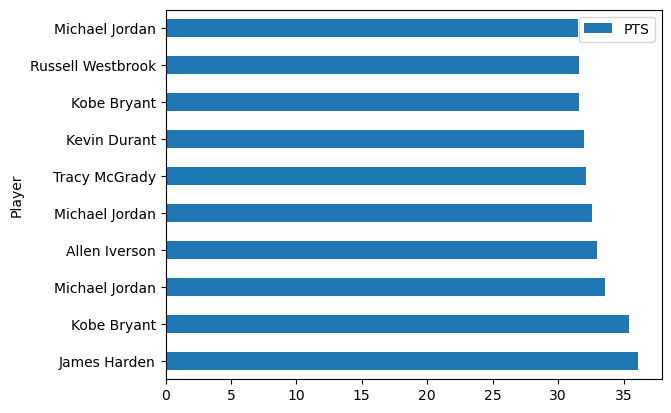

In [40]:
highest_scoring.plot.barh('Player', 'PTS')
plt.show()

In [41]:
highest_scoring_yearly = stats.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending=False).head(1))

In [42]:
highest_scoring_yearly

,,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
Year,,,,,,,,,,,,,,,,,,,,,,
1990,10922,Michael Jordan,SG,26,CHI,82,82,39.0,12.6,24.0,0.526,...,920.0,0.613,Chicago Bulls,55,27,0.671,4.0,109.5,106.2,2.74
1991,10933,Michael Jordan,SG,27,CHI,82,82,37.0,12.1,22.4,0.539,...,960.0,0.928,Chicago Bulls,61,21,0.744,0.0,110.0,101.0,8.57
1992,10946,Michael Jordan,SG,28,CHI,80,80,38.8,11.8,22.7,0.519,...,960.0,0.938,Chicago Bulls,67,15,0.817,0.0,109.9,99.5,10.07
1993,10959,Michael Jordan,SG,29,CHI,78,78,39.3,12.7,25.7,0.495,...,980.0,0.577,Chicago Bulls,57,25,0.695,0.0,105.2,98.9,6.19
1994,9626,David Robinson,C,28,SAS,80,80,40.5,10.5,20.7,0.507,...,1010.0,0.723,San Antonio Spurs,55,27,0.671,3.0,100.0,94.8,5.05
1995,8081,Shaquille O'Neal,C,22,ORL,79,79,37.0,11.8,20.2,0.583,...,1050.0,0.576,Orlando Magic,57,25,0.695,0.0,110.9,103.8,6.44
1996,11597,Michael Jordan,SG,32,CHI,82,82,37.7,11.2,22.6,0.495,...,1130.0,0.986,Chicago Bulls,72,10,0.878,0.0,105.2,92.9,11.80
1997,11611,Michael Jordan,SG,33,CHI,82,82,37.9,11.2,23.1,0.486,...,1150.0,0.832,Chicago Bulls,69,13,0.841,0.0,103.1,92.3,10.70
1998,11625,Michael Jordan,SG,34,CHI,82,82,38.8,10.7,23.1,0.465,...,1160.0,0.934,Chicago Bulls,62,20,0.756,0.0,96.7,89.6,7.24


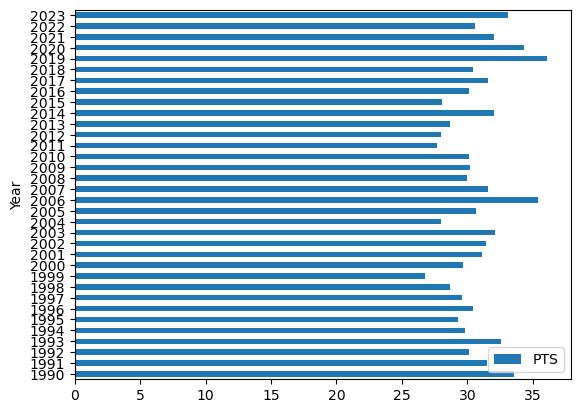

In [43]:
## Changes between highest scorers between 1990-2023.

highest_scoring_yearly.plot.barh('Year', 'PTS')
plt.show()

### Stat correlation to getting votes for the MVP award

In [44]:
## With this we can see what are the stats that contribute to the player getting MVP award. 
## Values closer to 1.0 have the most impact in getting the MVP award.

numeric_columns = stats.select_dtypes(include='number')
correlation_share = numeric_columns.corr()['Share']

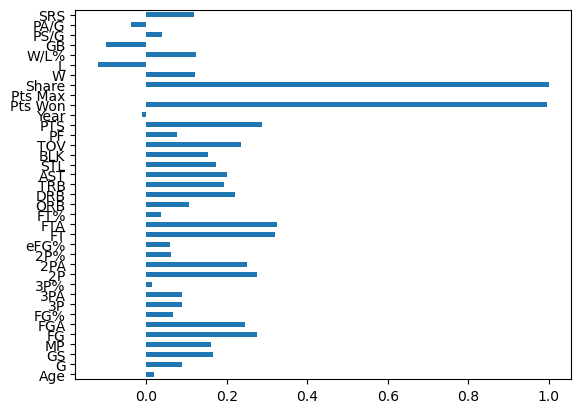

In [46]:
## Here we have a bar chart of the correlation. 

correlation_share.plot.barh()
plt.show()